# Linear Regression

## Introduction

Linear regression is a statistical method and a fundamental type of predictive analytical model used to describe the relationship between a dependent variable and one or more independent variables. It assumes a linear relationship between the input variables (X) and the single output variable (y).

### Mathematical Foundation

The general form of a linear regression model is:

$$y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_n x_p + \epsilon$$

Where:
- $y$ is the dependent variable (label/target)
- $x_1, x_2, ..., x_p$ are the independent variables (features/covariates)
- $\beta_0$ is the intercept (bias term)
- $\beta_1, \beta_2, ..., \beta_n$ are the coefficients (weights)
- $\epsilon$ is the error term (residual)

We can also write the model in matrix form:

$$y = X\beta + \epsilon$$

Where:
- $y$ has the shape of $(n, 1)$
- $X$ has the shape of $(n, p + 1)$: we add a column of 1s to the independent variables to account for the intercept
- $\beta$ has the shape of $(p + 1, 1)$
- $\epsilon$ has the shape of $(n, 1)$

### Key Assumptions of Linear Regression

1. **Linearity**: The relationship between X and the mean of y is linear
2. **Independence**: Observations are independent of each other
3. **Homoscedasticity**: The variance of residual is the same for any value of X
4. **Normality**: The residuals are normally distributed with a mean 0 and fixed variance
5. **No multicollinearity**: Independent variables are not highly correlated with each other

In this notebook, we will use the "Auto MPG" dataset to demonstrate the basic concepts of linear regression.

## The Data: Auto MPG Dataset

The "Auto MPG" dataset is one of the classic datasets available in the UCI Machine Learning Repository. It contains city-cycle fuel consumption estimates for various automobiles produced in the 1970s and 1980s. It is a commonly used dataset for regression analysis tasks in machine learning.

### Data Set Information

#### Variable Descriptions:

* **mpg** (continuous): Miles per gallon - our target variable
* **cylinders** (multi-valued discrete): Number of cylinders (3, 4, 5, 6, 8)
* **displacement** (continuous): Engine displacement in cubic inches
* **horsepower** (continuous): Engine horsepower
* **weight** (continuous): Vehicle weight in pounds
* **acceleration** (continuous): Time to accelerate from 0-60 mph in seconds
* **model year** (multi-valued discrete): Model year (70-82, representing 1970-1982)
* **origin** (multi-valued discrete): Origin of car (1: USA, 2: Europe, 3: Japan)
* **car name** (string): Name of the car (unique for each instance)

In [1]:
# Import necessary libraries for linear regression analysis
from typing import List
from typing import Tuple
from typing import Union

# Data manipulation and numerical computation
import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical modeling library for regression analysis
import statsmodels.formula.api as smf

# Progress bar for iterations
from tqdm import tqdm

# Configure visualization settings for better readability
sns.set_theme(font_scale=1.5)  # Increase font size for better visibility
sns.set_style("whitegrid", {"grid.linestyle": "--"})  # Set grid style with dashed lines

In [2]:
# Load the Auto MPG dataset from GitHub repository
# The dataset contains information about cars from the 1970s and 1980s
data = pd.read_csv("https://raw.githubusercontent.com/changyaochen/MECE4520/master/data/auto_mpg.csv")

# Let's drop any na values for now
data = data.dropna()

# Display the first 5 rows to understand the data structure
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino


## Exploratory Data Analysis (EDA)

### What is EDA?

Exploratory Data Analysis (EDA) refers to the process of visually and analytically inspecting data to uncover its main characteristics, often using statistical graphics, plots, and information tables. It's the critical first step in any data science or machine learning project.

### Why is EDA Important?

1. **Understanding Data Quality**: Identifies missing values, outliers, and data inconsistencies
2. **Discovering Patterns**: Reveals relationships between variables
3. **Testing Assumptions**: Verifies if data meets the assumptions for linear regression
4. **Feature Selection**: Helps identify which variables are most relevant
5. **Informing Model Choice**: Guides whether linear regression is appropriate

### CommonEDA Steps for Regression Analysis

For regression analysis, we typically examine:
1. **Distribution of the target variable**: Is it normally distributed? Are there outliers?
2. **Relationships between variables**: Are there linear relationships? How strong are they?
3. **Multicollinearity**: Are independent variables highly correlated with each other?
4. **Data quality**: Missing values, data types, and potential errors

EDA is often an iterative process: as you discover one feature or pattern in your data, it might lead you to look for other related features or patterns. Below, we will systematically explore the Auto MPG dataset.

### Step 1: Understanding the Target Variable Distribution

First, we examine the distribution of MPG (our target variable) to understand its range, central tendency, and shape:

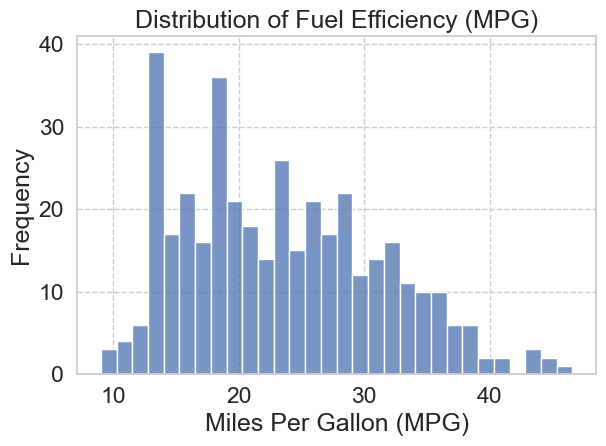

In [3]:
# Visualize the distribution of the dependent variable (MPG)
# This helps us understand:
# - The range of MPG values (roughly 10-45 mpg)
# - Whether the distribution is approximately normal (important for regression)
# - Presence of outliers or unusual patterns
sns.histplot(x="mpg", data=data, bins=30, kde=False)  # kde adds a smooth density curve, we don't need it here
plt.xlabel("Miles Per Gallon (MPG)")
plt.ylabel("Frequency")
plt.title("Distribution of Fuel Efficiency (MPG)")
plt.tight_layout()

### Step 2: Exploring Relationships Between Variables

Next, we examine how each continuous variable relates to MPG. These scatter plots help us:
- Identify which variables have strong relationships with MPG
- Determine if relationships are linear (suitable for linear regression)
- Spot outliers that might influence our model
- Understand the direction of relationships (positive or negative correlation)


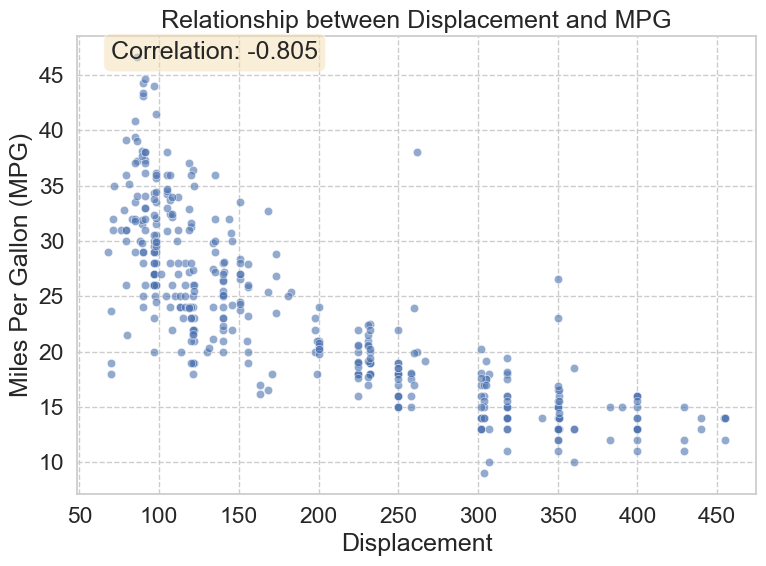

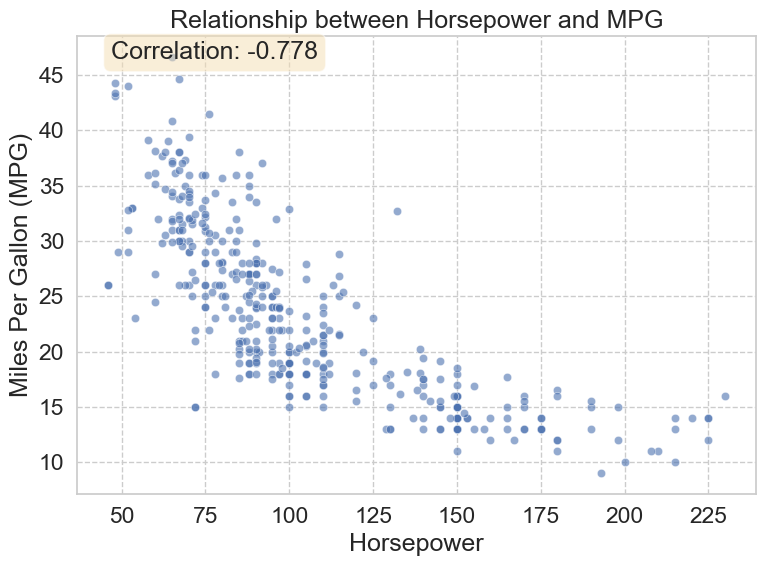

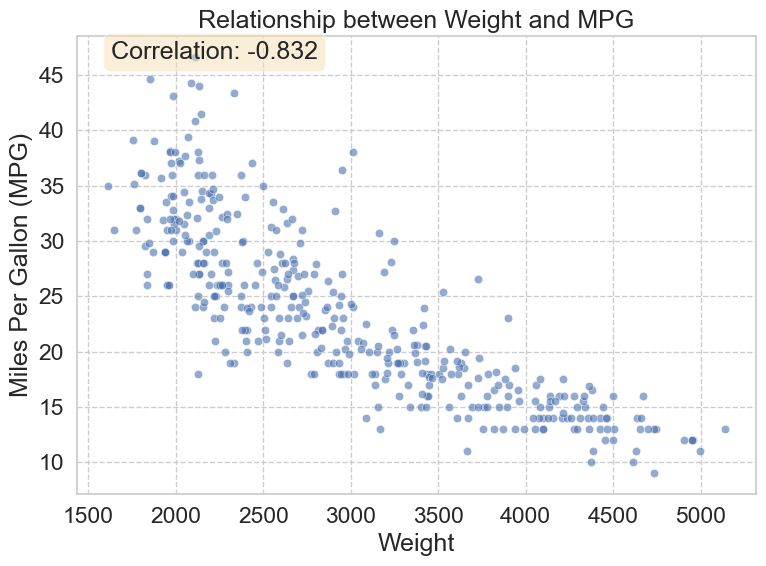

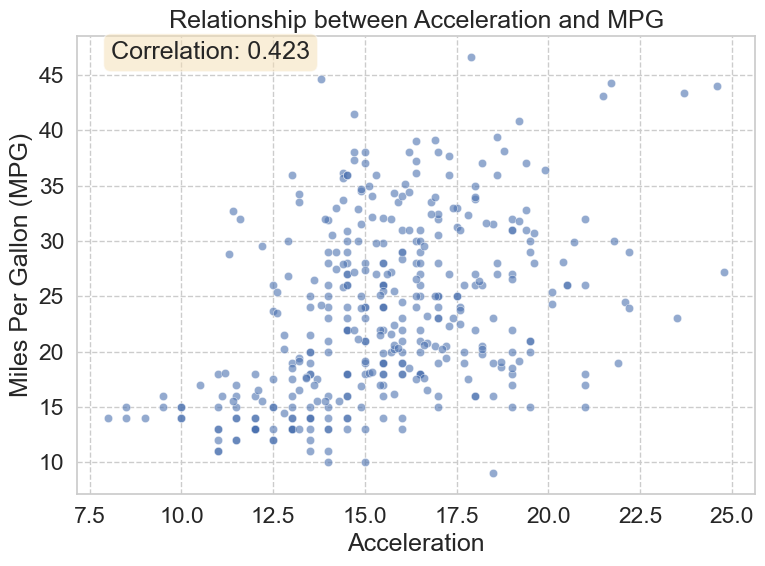

In [4]:
# Define the continuous variables we want to analyze
# These are the main continuous predictors in our dataset
continuous_variables = [
    "displacement",  # Engine size
    "horsepower",  # Engine power
    "weight",  # Vehicle weight
    "acceleration",  # Time to accelerate 0-60 mph
]

# Create scatter plots for each continuous variable vs MPG
# This helps visualize the strength and direction of relationships
for variable in continuous_variables:
    plt.figure(figsize=(8, 6))

    # Create scatter plot with alpha for overlapping points
    sns.scatterplot(x=variable, y="mpg", data=data, alpha=0.6)

    # Customize the plot
    plt.xlabel(variable.capitalize())
    plt.ylabel("Miles Per Gallon (MPG)")
    plt.title(f"Relationship between {variable.capitalize()} and MPG")

    # Calculate and display correlation coefficient
    correlation = np.corrcoef(data[variable], data["mpg"])[0, 1]
    plt.text(0.05, 0.95, f"Correlation: {correlation:.3f}",
             transform=plt.gca().transAxes,
             bbox=dict(boxstyle="round", facecolor="wheat", alpha=0.5))

    plt.tight_layout()